# Graphene Density of States

In [2]:
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [39]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## Helper Functions

In [44]:
def check_pid(pid):
    """ check for existence of unix pid. copied from stack overflow 
        if kill process returns an error, we don't have a pid -> return False
        else, we do have a pid -> return True 
    """
    try: 
        os.kill(pid, 0)
    except OSErrow:
        return False 
    else:
        return True 

def observe_job(process, wait):
    """ checks on job or just lets it proceed """
    if wait:
        # Wait for completion of a child process given by process id pid, 
        # and return a tuple containing its process id and exit status indication
        os.waitpid(process.pid, 0)
    else: 
        while check_pid(process.pid):
            time.sleep(1) 

def run_command(command):
    """ runs command line command via subprocess
        waits until process is finished until it returns the pid 
    """
    command_run = subprocess.Popen(command, shell = True)
    
    # gets the pid of the process
    pid = myrun.pid
    observe_job(process = command_run, wait = True)
    return pid 

In [46]:
def graphene_dos():
    """ runs shell commands and takes graphene.dos file and reads 
        into pandas dataframe 
    """
    step_one = run_command("pw.x -in pw.graphene.scf.in > pw.graphene.scf.out", shell = True)
    step_two = run_command("pw.x -in pw.graphene.nscf.in > pw.graphene.nscf.out", shell = True)
    step_three = run_command("dos.x -in dos.graphene.in > dos.graphene.out", shell = True)
    
    dos_data = pd.read_csv('graphene.dos', delim_whitespace = True,\
                        skiprows=1, header = None, names = ['E (eV)', 'DOS', 'Int DOS'])
    
    return dos_data

## Data Processing and Plotting 

In [37]:
dos_data = pd.read_csv('graphene.dos', delim_whitespace = True,\
                        skiprows=1, header = None, names = ['E (eV)', 'DOS', 'Int DOS'])

In [38]:
dos_data

,E (eV),DOS,Int DOS
0,-18.898,0.1360,0.002186
1,-18.888,0.1747,0.003742
2,-18.878,0.2099,0.005668
3,-18.868,0.2415,0.007928
4,-18.858,0.2695,0.010490
...,...,...,...
3250,13.602,0.1697,15.990000
3251,13.612,0.1578,15.990000
3252,13.622,0.1454,15.990000
3253,13.632,0.1326,15.990000


In [24]:
dos = dos_data.to_numpy()

In [35]:
dos = dos_data.to_numpy()
energy = dos.transpose()[0]
density_of_states = dos.transpose()[1]
int_dos = dos.transpose()[2]

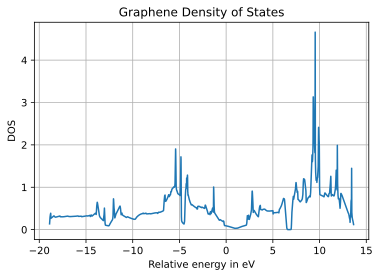

In [43]:
plt.plot(energy, density_of_states)
plt.xlabel('Relative energy in eV')
plt.ylabel('DOS')
plt.title('Graphene Density of States')
plt.grid()